## SIMPLE LINEAR REGRESSION   : weight prediction using height

#### Importing required libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score


#### Loading and analyzing data

In [2]:
# Load Data
df = pd.read_csv('height_weight_data.csv')
df.head()

,Height,Weight
0,167,65
1,182,85
2,175,72
3,160,60
4,170,68


In [3]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [4]:
# no of rows and columns in data set (rows,columns)

df.shape

(20, 2)

In [5]:
# Decide features and target variable 

X = df[['Height']]  # Features (height)
y = df['Weight']   # Target variable (weight)

Text(0, 0.5, 'Weight')

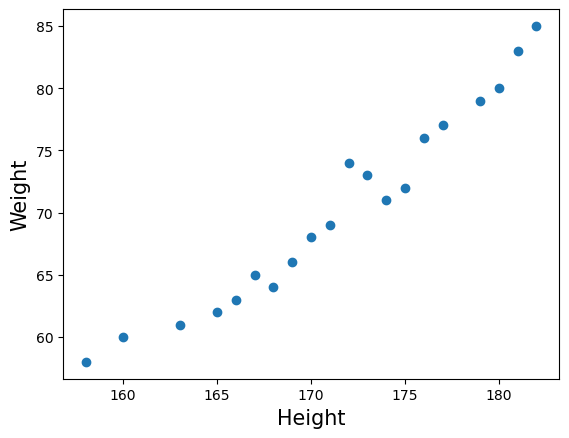

In [6]:
# scatter plot of Height VS Weight

plt.scatter(X,y)
plt.xlabel('Height',fontsize = 15)
plt.ylabel('Weight',fontsize = 15)

###### NOTE : since data is linear , lets apply linear regression

#### Train Test split

In [7]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Height
8,158
5,180
11,173
3,160
18,177
16,171
13,181
2,175
9,176
19,179


In [9]:
X_test

,Height
0,167
17,166
15,163
1,182


In [10]:
y_train

8     58
5     80
11    73
3     60
18    77
16    69
13    83
2     72
9     76
19    79
4     68
12    66
7     74
10    64
14    71
6     62
Name: Weight, dtype: int64

In [11]:
y_test

0     65
17    63
15    61
1     85
Name: Weight, dtype: int64

#### Standardization of Feature

In [12]:
# standardization of the feature X (applying z score to each data points)

# create instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data 
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[-2.1296085 ],
       [ 1.2777651 ],
       [ 0.19360077],
       [-1.81984727],
       [ 0.81312325],
       [-0.11616046],
       [ 1.43264572],
       [ 0.50336201],
       [ 0.65824263],
       [ 1.12288448],
       [-0.27104108],
       [-0.4259217 ],
       [ 0.03872015],
       [-0.58080232],
       [ 0.34848139],
       [-1.04544418]])

In [14]:
X_test_scaled

array([[-0.73568294],
       [-0.89056356],
       [-1.35520541],
       [ 1.58752634]])

#### Training the model

In [15]:
# Create and fit the model

# create instance of LinearRegression
model = LinearRegression()

# fit the training data to the model
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Applying the model to make prediction

In [16]:
y_train_pred = model.predict(X_train_scaled)
y_train_pred

array([55.94865067, 79.6308096 , 72.09557721, 58.10157421, 76.40142429,
       69.94265367, 80.70727136, 74.24850075, 75.32496252, 78.55434783,
       68.8661919 , 67.78973013, 71.01911544, 66.71326837, 73.17203898,
       63.48388306])

In [17]:
y_test_pred = model.predict(X_test_scaled)
y_test_pred

array([65.6368066 , 64.56034483, 61.33095952, 81.78373313])

#### Applying the model to make prediction of new data

In [18]:
# predicting the weight of new height 

new_height = np.array([[162]]) 

# Standardize the new height
new_height_scaled = scaler.transform(new_height)

# Predict the weight
predicted_weight = model.predict(new_height_scaled)
predicted_weight

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([60.25449775])

#### Visualization of Prediction

Text(0, 0.5, 'Weight')

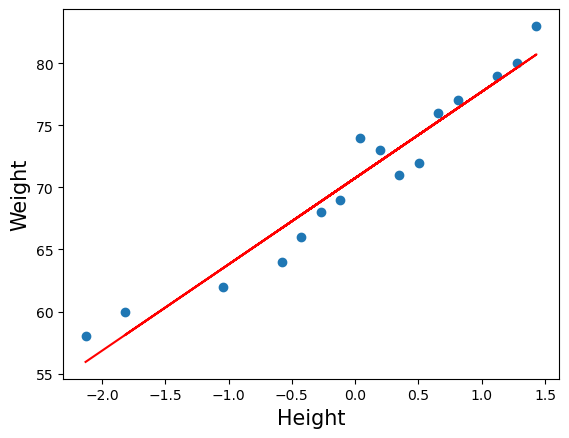

In [27]:
# plot best fit line with training data

plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,model.predict(X_train_scaled),'red')
plt.xlabel('Height',fontsize = 15)
plt.ylabel('Weight',fontsize = 15)

Text(0, 0.5, 'Weight')

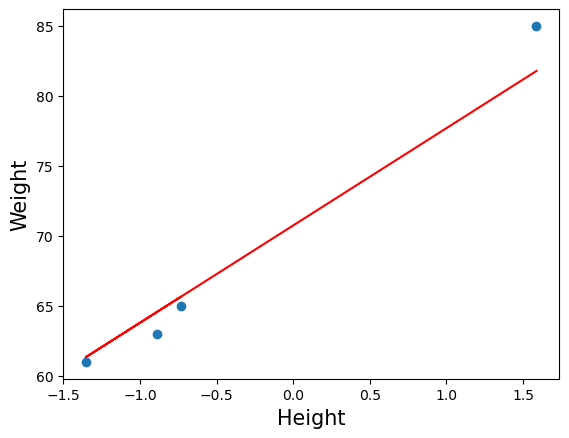

In [28]:
# plot best fit line with testing data

plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,model.predict(X_test_scaled),'red')
plt.xlabel('Height',fontsize = 15)
plt.ylabel('Weight',fontsize = 15)

In [19]:
# slope of line

model.coef_

array([6.95026776])

In [20]:
# y intercept of line

model.intercept_

70.75

### Model perfomance analysis

In [21]:
# calculating mse ,mae ,rmse(low error metrics indicates model is performing good)

mse = mean_squared_error(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.323526345897532
1.4360944527736166
1.8230541258825894


###### NOTE : Your model's performance is strong, with small errors (MSE = 3.32, MAE = 1.44, RMSE = 1.82) relative to the target range (150-200), indicating accurate predictions and minimal deviation from actual values.


In [22]:
#  calculate r squared (gives the accuracy of the model)

r2_test  = r2_score(y_test,y_test_pred)
print(r2_test*100)  


96.41668318501614


###### NOTE : model explains 96.41% of the variance in the target variable

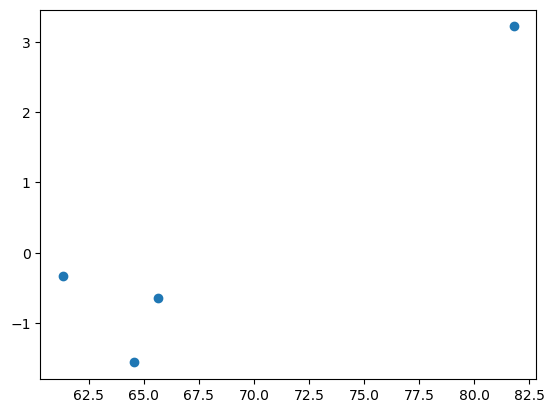

In [23]:
 # reidual analysis

residuals =y_test - y_test_pred

plt.scatter(y_test_pred,residuals)

###### NOTE : since residuals vs predicted plot is scattered => Good model

In [27]:
# table compairing training and test mse and r2

test_mse = mean_squared_error(y_test,y_test_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
r2_test  = r2_score(y_test,y_test_pred)
r2_train  = r2_score(y_train,y_train_pred)

train_test_comparison = pd.DataFrame({
    'Method': ['Linear Regression'],
    'Train MSE': [train_mse],
    'Test MSE': [test_mse],
    'Train R²': [r2_train],
    'Test R²': [r2_test]
})

train_test_comparison

,Method,Train MSE,Test MSE,Train R²,Test R²
0,Linear Regression,3.006278,3.323526,0.941412,0.964167


###### `NOTE : There is no marked variation in testing and training mse and r2

### Conclusion 

##### LR model make good prediction 